#Import needed modules

In [0]:
import math
import re
from collections import defaultdict, Counter
from nltk import ngrams
import pandas as pd
import glob as gb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
with open('corpus.sent.en.train', 'r', encoding='utf8') as f:
    lines = f.readlines()

#Tokenizer

In [0]:
def tokenize(text):
    "List all the word tokens (consecutive letters) in a text. Normalize to lowercase."
    return re.findall('[a-z]+', text.lower())

#word-gram method

In [0]:
def word_ngrams(sent, n):
    """Givne a sent as str return n-grams as a list of tuple"""
    
    # EXAMPLES 
    # > word_ngrams('hello world', 1)
    # [('hello',), ('world',)]
    # > word_ngrams('hello world', 2)
    # [('<s>', 'hello'), ('hello', 'world'), ('world', '</s>')]

    # YOUR CODE HERE
    tp=()
    listtp= []
    token = tokenize(sent)
    #if it is not 1-gram append <s> to the begining and </s> at the end
    if(n!=1):
        for x in range(n-1):
            token.insert(0,"<s>")
        token.append("</s>")
    
    #generate n-grams using the zip function in python
    ngrams = zip(*[token[i:] for i in range(n)])
    
    #loop through the n-grams generated and create list of tuples
    for ngram in ngrams:
        listtp.append(ngram)
        
    return listtp

In [0]:
#We declare this method to generate the n-grams assisting the 
def getGram(lines, n):
    bigramst=[]
    if type(lines) == list:
        for sentences in lines:
            bg=word_ngrams(sentences, n)
            bigramst+=bg
    else:
        bigramst = word_ngrams(lines, n)
    return bigramst

In [0]:
class ngram_LM:
    """A class to represent a language model."""

    def __init__(self, n, ngram_counts, vocab, unk=False):
        """"Make a n-gram language model, given a vocab and
            data structure for n-gram counts."""
        
        self.n = n 
        
        self.vocab = vocab
        
        self.V = len(vocab)
        
        self.ngram_counts = ngram_counts
        
        self.histCount = Counter()
        
        for key, value in ngram_counts.items():
            self.histCount[key[:-1]] += value

        # YOUR CODE HERE
        # START BY MAKING THE RIGHT COUNTS FOR THIS PARTICULAR self.n 
         
   

    def estimate_prob(self, history, word):
        """Estimate probability of a word given a history."""
        # YOUR CODE HERE
        probability=0
        denominator=0
        if(self.n==1):
          #count the number of times word exist
          probability=self.ngram_counts[word]/len(one_gram)
        else:
          #count the number of times words exist with history
          # YOUR CODE HERE
            if type(history) == str:
                history = (history,)
            numerator=self.ngram_counts[history + (word,)]
            denominator = self.histCount[history]
            probability=numerator/denominator
        return probability

    
    def estimate_smoothed_prob(self, history, word, alpha = 0.5):
        """Estimate probability of a word given a history with Lidstone smoothing."""
        
        if self.n == 1:
            return (alpha + self.ngram_counts[word])/(alpha*self.V + len(one_gram)) #sum(self.ngram_counts.values()))
            
        else:
            if type(history) == str:
                history = (history,)
            return (alpha + self.ngram_counts[history + (word,)])/(alpha*self.V + self.histCount[history])
        
            

    def logP(self, history, word, alpha = 0.5):
        """Return base-2 log probablity."""
        
        prob = self.estimate_smoothed_prob(history, word, alpha)
        
        if prob == 0:
            return 0
        
        return math.log(prob, 2)
    
    
    
    def logP_unsmoothed(self, history, word):
        """Return base-2 log probablity."""
        prob = self.estimate_smoothed_prob(history, word)
        
        if prob == 0:
            return 0
        
        return math.log(prob, 2)
    


    def score_sentence(self, sentence):
        """Given a sentence, return score."""
        prob = 0;
        
        for gram in sentence:
            prob += -self.logP(gram[0], gram[1])
            
        return prob/len(sentence)


 
    def test_LM(self):
        """Test whether or not the probability mass sums up to one."""
        
        precision = 10**-8
                 
        if self.n == 1:
                 
            P_sum = sum(self.estimate_prob('', w) for w in self.vocab)
            
            assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one.'
                 
        elif self.n == 2:
            histories = ['the', 'in', 'at', 'blue', 'white']
                 
            for h in histories:

                P_sum = sum(self.estimate_prob(h, w) for w in self.vocab)
                
                assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one for history' + h
                     
        print('TEST SUCCESSFUL!')



    def test_smoohted_LM(self):
        """Test whether or not the smoothed probability mass sums up to one."""
        precision = 10**-8
        
        if self.n == 1:
                 
            P_sum = sum(self.estimate_smoothed_prob('', w) for w in self.vocab)
            
            assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one.'
                 
        elif self.n == 2:
            histories = ['the', 'in', 'at', 'blue', 'white']
            
            for h in histories:
                P_sum = sum(self.estimate_smoothed_prob(h, w) for w in self.vocab)
                
                assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one for history "' + h + '"'
        
        print('TEST SUCCESSFUL!')
        
            
            
    def perplexity_smoothed(self, corpus, alpha):
        M = len(corpus)        
        
        if self.n == 1:
            likelihood = sum(self.logP('', x,alpha) for x in corpus)
        else:
            likelihood = sum(self.logP(x[:-1], x[-1],alpha) for x in corpus)
            
        perplexity = pow(2, (-likelihood/M))
        return perplexity
    
    
    def perplexity_unsmoothed(self, corpus):
        M = len(corpus)        
        
        if self.n == 1:
            likelihood = sum(self.logP_unsmoothed('', x) for x in corpus)
        else:
            likelihood = sum(self.logP_unsmoothed(x[:-1], x[-1]) for x in corpus)
            
        perplexity = pow(2, (-likelihood/M))
        return perplexity

In [0]:
with open('lm_eval/wiki.test', 'r', encoding='utf8') as f:
    wikiTest = f.readlines()
with open('lm_eval/simple.test', 'r', encoding='utf8') as f:
    simpleTest = f.readlines()

In [0]:
# ADD YOUR CODE TO COLLECT COUTNS AND CONSTRUCT VOCAB
one_gram = getGram(lines, 1)
two_gram = getGram(lines, 2)
ugCount=Counter(one_gram)
bgCount=Counter(two_gram)

In [0]:
#     total_counts = sum(ngram_counts.values())
vocab = list(ugCount.keys())

biVocab = []
for key in ugCount.keys():
    biVocab.extend(tokenize(str(key)))

biVocab.append('<s>')
biVocab.append('</s>')

# ONCE YOU HAVE N-GRAN COUNTS AND VOCAB, 
# YOU CAN BUILD LM OBJECTS AS ... 

unigram_LM = ngram_LM(1, ugCount, vocab)
bigram_LM = ngram_LM(2, bgCount, biVocab)

In [30]:
# THEN TEST YOUR IMPLEMENTATION AS ..
print("\n\nTest Unigram LM")
unigram_LM.test_LM()
print("\nTest Bigram LM")
bigram_LM.test_LM()



Test Unigram LM
TEST SUCCESSFUL!

Test Bigram LM
TEST SUCCESSFUL!


#Excercise 2.2 from the previous assignment

In [31]:
print("\nTest Unigram Smoothed LM")
# unigram_LM.test_smoohted_LM()
print("\nTest Bigram Smoothed LM")
# bigram_LM.test_smoohted_LM()

DE_sentence = "Gestern war ich zu Hause."
EN_hypothesis1 = "Yesterday was I at home."
EN_hypothesis2 = "Yesterday I was at home."
EN_hypothesis3 = "I was at home yesterday."

DE_one_gram = getGram(DE_sentence, 1)
DE_two_gram = getGram(DE_sentence, 2)
EN_h1_one_gram = getGram(EN_hypothesis1, 1)
EN_h1_two_gram = getGram(EN_hypothesis1, 2)
EN_h2_one_gram = getGram(EN_hypothesis2, 1)
EN_h2_two_gram = getGram(EN_hypothesis2, 2)
EN_h3_one_gram = getGram(EN_hypothesis3, 1)
EN_h3_two_gram = getGram(EN_hypothesis3, 2)


print("\n\nScore for EN hypothesis 1")
print(bigram_LM.score_sentence(EN_h1_two_gram))
print("\nScore for EN hypothesis 2")
print(bigram_LM.score_sentence(EN_h2_two_gram))
print("\nScore for EN hypothesis 3")
print(bigram_LM.score_sentence(EN_h3_two_gram))


Test Unigram Smoothed LM

Test Bigram Smoothed LM


Score for EN hypothesis 1
11.067792035061165

Score for EN hypothesis 2
9.10353124459993

Score for EN hypothesis 3
8.644538675138644


In [0]:
uniWiki = getGram(wikiTest, 1)
biWiki = getGram(wikiTest, 2)
uniSimple = getGram(simpleTest, 1)
biSimple = getGram(simpleTest, 2)

In [35]:
print("The perplexity for wiki using Unigram unsmoothed = "+ str(unigram_LM.perplexity_unsmoothed(uniWiki)))

The perplexity for wiki using Unigram unsmoothed = 1840.5129432009214


In [38]:
print("The perplexity for wiki using Unigram smoothed with alpha 0.2 = "+ str(unigram_LM.perplexity_smoothed(uniWiki, 0.2)))

The perplexity for wiki using Unigram smoothed with alpha 0.2 = 1860.259340310534


In [39]:
print("The perplexity for wiki using Bigram unsmoothed  = "+ str(bigram_LM.perplexity_unsmoothed(biWiki)))

The perplexity for wiki using Bigram smoothed  = 2570.4933353998963


In [40]:
print("The perplexity for wiki using Bigram smoothed with alpha 0.2 = "+str(bigram_LM.perplexity_smoothed(biWiki, alpha=0.2)))

The perplexity for wiki using Bigram smoothed with alpha 0.2 = 1788.3470255819038


In [42]:
print("The perplexity for Simple using Unigram unsmoothed = "+ str(unigram_LM.perplexity_unsmoothed(uniSimple)))

The perplexity for Simple using Unigram unsmoothed = 1160.6389366733595


In [43]:
print("The perplexity for Simple using Bigram smoothed with alpha 0.2 = "+ str(unigram_LM.perplexity_smoothed(uniSimple, 0.2)))

The perplexity for wiki using Bigram smoothed with alpha 0.2 = 1163.1940608423142


In [44]:
print("The perplexity for Simple using Bigram smoothed  = "+ str(bigram_LM.perplexity_unsmoothed(biSimple)))

The perplexity for Simple using Bigram smoothed  = 1358.7308346199763


In [45]:
print("The perplexity for wiki using Bigram smoothing alpha 0.2  = "+ str(bigram_LM.perplexity_smoothed(biSimple, alpha=0.2)))

The perplexity for wiki using Bigram smoothing alpha 0.2  = 915.3056785061907


In [0]:
#percentage of unseen unigram and bigram

oovWiki_uni = (len(set(uniWiki) - set(one_gram))/len(set(uniWiki))) * 100
oovWiki_bi = (len(set(biWiki) - set(two_gram))/len(set(biWiki))) * 100

oovSimple_uni = (len(set(uniSimple) - set(one_gram))/len(set(uniSimple))) * 100
oovSimple_bi = (len(set(biSimple) - set(two_gram))/len(set(biSimple))) * 100

In [47]:
print("Out of vocabulary rate for wiki.test unigrams:" + str(oovWiki_uni) + "%")

Out of vocabulary rate for wiki.test unigrams:7.759869612459254%


In [48]:
print("Out of vocabulary rate for wiki.test bigrams:" + str(oovWiki_bi) + "%")

Out of vocabulary rate for wiki.test bigrams:31.42635556582291%


In [49]:
print("Out of vocabulary rate for simple.test unigrams:" + str(oovSimple_uni) + "%")

Out of vocabulary rate for simple.test unigrams:1.962809917355372%


In [50]:
print("Out of vocabulary rate for simple.test unigrams:" + str(oovSimple_bi) + "%")

Out of vocabulary rate for simple.test unigrams:18.957816377171216%


In [0]:
def plotPerplexity(corpus, description, n):
    pp = []
    smoothing_factor = list(np.arange(0.1, 1.1, 0.1))
    
    # Creating an empty Dataframe with column names only
    pd.set_option('display.max_columns', 30)
    dfObj2 = pd.DataFrame(columns=['Smoothing Factor', 'Perplexity'])
    
    for i in smoothing_factor:
        if n == 1:
            p = unigram_LM.perplexity_smoothed(corpus, i)
            pp.append(p)
            dfObj2 = dfObj2.append({'Smoothing Factor': i,'Perplexity': p}, ignore_index=True)
        if n == 2:
            p = bigram_LM.perplexity_smoothed(corpus, i)
            pp.append(p)
            dfObj2 = dfObj2.append({'Smoothing Factor': i,'Perplexity': p}, ignore_index=True)
            
    print('Perplexities of ' + description)
    print(dfObj2)      
    
    graph = plt.figure()
    plt.xlabel('alpha')
    plt.ylabel('perplexity')
    plt.plot(smoothing_factor, pp)
    graph.suptitle('Perplexities of ' + description)
    graph.savefig(description)
    plt.show()
    plt.clf()

Perplexities of wiki unigram
   Smoothing Factor   Perplexity
0               0.1  1875.199033
1               0.2  1860.259340
2               0.3  1851.506957
3               0.4  1845.304311
4               0.5  1840.512943
5               0.6  1836.624933
6               0.7  1833.368409
7               0.8  1830.580315
8               0.9  1828.154877
9               1.0  1826.019408


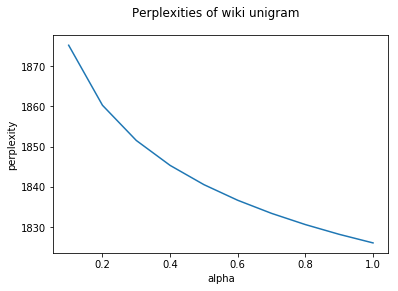

Perplexities of wiki bigram
   Smoothing Factor   Perplexity
0               0.1  1413.981586
1               0.2  1788.347026
2               0.3  2085.832885
3               0.4  2341.760576
4               0.5  2570.493335
5               0.6  2779.589814
6               0.7  2973.619443
7               0.8  3155.598995
8               0.9  3327.646083
9               1.0  3491.315958


<Figure size 432x288 with 0 Axes>

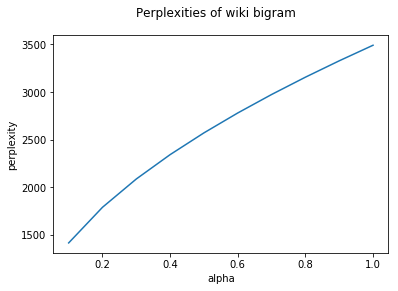

Perplexities of Simple unigram
   Smoothing Factor   Perplexity
0               0.1  1165.643720
1               0.2  1163.194061
2               0.3  1161.924119
3               0.4  1161.144663
4               0.5  1160.638937
5               0.6  1160.309815
6               0.7  1160.105090
7               0.8  1159.993313
8               0.9  1159.953996
9               1.0  1159.972998


<Figure size 432x288 with 0 Axes>

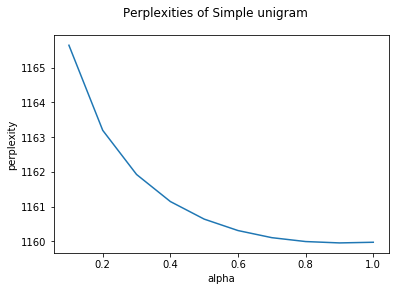

Perplexities of Simple bigram
   Smoothing Factor   Perplexity
0               0.1   713.617239
1               0.2   915.305679
2               0.3  1080.772340
3               0.4  1226.345512
4               0.5  1358.730835
5               0.6  1481.489822
6               0.7  1596.793457
7               0.8  1706.085754
8               0.9  1810.387158
9               1.0  1910.451685


<Figure size 432x288 with 0 Axes>

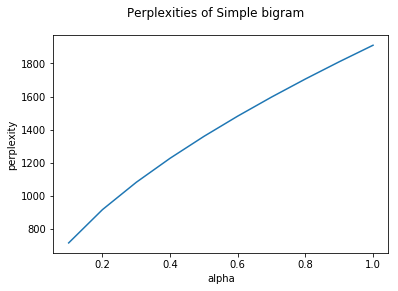

<Figure size 432x288 with 0 Axes>

In [57]:
plotPerplexity(uniWiki, "wiki unigram", 1)
plotPerplexity(biWiki, "wiki bigram", 2)
plotPerplexity(uniSimple, "Simple unigram", 1)
plotPerplexity(biSimple, "Simple bigram", 2)

Question 2.2

In [0]:
with open('lm_eval/yodish.sent', 'r', encoding='utf8') as f:
    yodaTest = f.readlines()
with open('lm_eval/english.sent', 'r', encoding='utf8') as f:
    englishTest = f.readlines()
#discovered an empty list of unigram, thus removing any empty unigram or bigram
yodaTest.remove('\n')
englishTest.remove('\n') 

In [0]:
# bigram_LM.test_smoohted_LM()
yodaBig=[]
yodaScore=[]
for x in yodaTest:
  x.replace('\n','')
  gram=getGram(x, 2)
  yodaBig.append(gram)
  yodaScore.append(bigram_LM.score_sentence(gram))

engBig=[]
engScore=[]
for x in englishTest:
  x.replace('\n','')
  gram=getGram(x, 2)
  engBig.append(gram)
  engScore.append(bigram_LM.score_sentence(gram))
  #the difference between sentences are calculated here
delta = [abs(a - b) for a, b in zip(yodaScore,engScore)]
#get the index of the minimum and maximum difference
minDiffIndx=delta.index(min(delta))
maxDiffIndx=delta.index(max(delta))

In [77]:
import pandas as p
d = {'Yodaish':yodaTest,'Yoda_Score':yodaScore,'English':englishTest,'English_Score':engScore}
df = pd.DataFrame(d)
df


,Yodaish,Yoda_Score,English,English_Score
0,"Once you start down the dark path, forever wil...",12.857286,"Once you start down the dark path, it will for...",12.031764
1,"Patience you must have, my young padawan.\n",13.435205,"You must have patience, my young padawan.\n",12.732900
2,"When nine hundred years old you reach, look as...",10.563505,"When you reach nine hundred years old, you wil...",9.490062
3,"Truly wonderful, the mind of a child is.\n",11.238907,The mind of a child is truly wonderful.\n,9.836885
4,"Clear your mind must be, if you are to find th...",11.142280,"Your mind must be clear, if you are to find th...",10.516181
5,"Always two there are, no more, no less. A mast...",10.865613,"There are always two, no more, no less. A mast...",10.390856
6,"In this war, a danger there is, of losing who ...",9.383994,"In this war, there is a danger of losing who w...",8.536240
7,So certain were you. Go back and closer you mu...,10.874304,You were so certain. Go back and you must look...,10.396722
8,"If no mistake have you made, yet losing you ar...",11.423906,"If you have made no mistake, yet you are losin...",9.796302
9,"Powerful you have become, the dark side I sens...",10.873147,"You have become powerful, I sense the dark sid...",10.666543


In [59]:
print(yodaTest[maxDiffIndx])
print(englishTest[maxDiffIndx])

Like his master before him, be destroyed, he must.

He must be destroyed before him, like his master. 



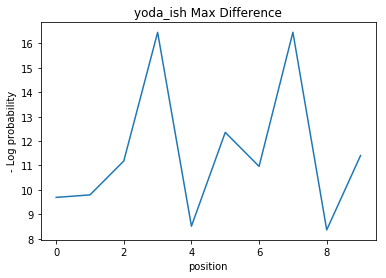

In [101]:
x_axisyodaBig=list(range(0,len(yodaBig[maxDiffIndx])))
y_axisyodaBig=[]
for x in yodaBig[maxDiffIndx]:
  y_axisyodaBig.append(-math.log(bigram_LM.estimate_smoothed_prob(x[0],x[1]),2))

import matplotlib.pyplot as plt
plt.plot(x_axisyodaBig,y_axisyodaBig)
plt.ylabel('- Log probability')
plt.xlabel('position')
plt.title("yoda_ish Max Difference")
plt.savefig("yoda_ish_Max_Difference")
plt.show()

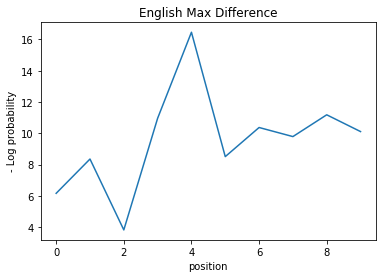

In [100]:
x_axisEngBig=list(range(0,len(engBig[maxDiffIndx])))
y_axisEngBig=[]
for x in engBig[maxDiffIndx]:
  y_axisEngBig.append(-math.log(bigram_LM.estimate_smoothed_prob(x[0],x[1]),2))
import matplotlib.pyplot as plt
plt.plot(x_axisEngBig,y_axisEngBig)
plt.ylabel('- Log probability')
plt.xlabel('position')
plt.title("English Max Difference")
plt.savefig("English_Max_Difference")
plt.show()

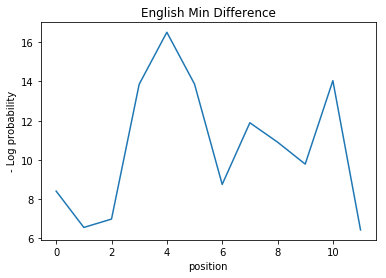

In [103]:
x_axisEngBigMin=list(range(0,len(engBig[minDiffIndx])))
y_axisEngBigMin=[]
for x in engBig[minDiffIndx]:
  y_axisEngBigMin.append(-math.log(bigram_LM.estimate_smoothed_prob(x[0],x[1]),2))
import matplotlib.pyplot as plt
plt.plot(x_axisEngBigMin,y_axisEngBigMin)
plt.ylabel('- Log probability')
plt.xlabel('position')
plt.title("English Min Difference")
plt.savefig("English_Min_Difference")
plt.show()

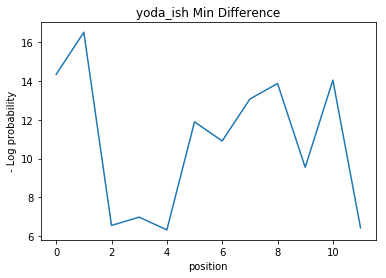

In [104]:
x_axisyodaBigmin=list(range(0,len(yodaBig[minDiffIndx])))
y_axisyodaBigmin=[]
for x in yodaBig[minDiffIndx]:
  y_axisyodaBigmin.append(-math.log(bigram_LM.estimate_smoothed_prob(x[0],x[1]),2))
plt.plot(x_axisyodaBigmin,y_axisyodaBigmin)
plt.ylabel('- Log probability')
plt.xlabel('position')
plt.title("yoda_ish Min Difference")
plt.savefig("yoda_ish_Min_Difference")
plt.show()

In [0]:
#do plottings here 